### Office data set from Kaggle. I am using it to create a plot of the viewership with the number of episodes. The color scheme indicates the scaled ratings of each episode and the larger sized points indicate that there was a guest star in that episode


In [29]:
import pandas as pd
import numpy as np
office=pd.read_csv('the_office_series.csv')

In [30]:
office.head()


,Unnamed: 0,Season,EpisodeTitle,About,Ratings,Votes,Viewership,Duration,Date,GuestStars,Director,Writers
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,24 March 2005,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,29 March 2005,NaN,Ken Kwapis,B. J. Novak
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,5 April 2005,NaN,Ken Whittingham,Paul Lieberstein
3,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.4,23,12 April 2005,NaN,Bryan Gordon,Michael Schur
4,4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.0,23,19 April 2005,NaN,Greg Daniels,Greg Daniels


In [31]:
office.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    188 non-null    int64  
 1   Season        188 non-null    int64  
 2   EpisodeTitle  188 non-null    object 
 3   About         188 non-null    object 
 4   Ratings       188 non-null    float64
 5   Votes         188 non-null    int64  
 6   Viewership    188 non-null    float64
 7   Duration      188 non-null    int64  
 8   Date          188 non-null    object 
 9   GuestStars    29 non-null     object 
 10  Director      188 non-null    object 
 11  Writers       188 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 17.8+ KB


In [32]:
office.describe(include='all')

,Unnamed: 0,Season,EpisodeTitle,About,Ratings,Votes,Viewership,Duration,Date,GuestStars,Director,Writers
count,188.000000,188.000000,188,188,188.000000,188.000000,188.000000,188.000000,188,29,188,188
unique,NaN,NaN,188,188,NaN,NaN,NaN,NaN,184,28,54,47
top,NaN,NaN,Couples Discount,"During Jim and Pam's daughter's christening, M...",NaN,NaN,NaN,NaN,9 April 2009,Amy Adams,Paul Feig,Mindy Kaling
freq,NaN,NaN,1,1,NaN,NaN,NaN,NaN,2,2,15,20
mean,93.500000,5.468085,NaN,NaN,8.237234,2838.228723,7.246330,27.053191,NaN,NaN,NaN,NaN
std,54.415071,2.386245,NaN,NaN,0.589930,1063.165290,2.066012,6.937254,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,NaN,6.600000,1832.000000,3.250000,19.000000,NaN,NaN,NaN,NaN
25%,46.750000,3.000000,NaN,NaN,7.800000,2187.750000,5.990000,22.000000,NaN,NaN,NaN,NaN
50%,93.500000,6.000000,NaN,NaN,8.200000,2614.000000,7.535000,23.000000,NaN,NaN,NaN,NaN
75%,140.250000,7.250000,NaN,NaN,8.600000,3144.250000,8.425000,30.000000,NaN,NaN,NaN,NaN


Renaming the first column

In [33]:
office.columns

Index(['Unnamed: 0', 'Season', 'EpisodeTitle', 'About', 'Ratings', 'Votes',
       'Viewership', 'Duration', 'Date', 'GuestStars', 'Director', 'Writers'],
      dtype='object')

In [34]:
office.rename(columns={'Unnamed: 0':'EpisodeNum'}, inplace=True)

Creating a new column of scaled ratings

In [35]:
max_rating=office['Ratings'].max()
print(max_rating)
office['ScaledRating']=(office['Ratings']-office['Ratings'].min())/(office['Ratings'].max()-office['Ratings'].min())
office.head()

9.8


,EpisodeNum,Season,EpisodeTitle,About,Ratings,Votes,Viewership,Duration,Date,GuestStars,Director,Writers,ScaledRating
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,24 March 2005,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,0.28125
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,29 March 2005,NaN,Ken Kwapis,B. J. Novak,0.53125
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,5 April 2005,NaN,Ken Whittingham,Paul Lieberstein,0.37500
3,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.4,23,12 April 2005,NaN,Bryan Gordon,Michael Schur,0.46875
4,4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.0,23,19 April 2005,NaN,Greg Daniels,Greg Daniels,0.56250


Create a new column that is a boolean column with value True if Guest star exists else false

In [46]:
office['has_guests']=~office['GuestStars'].isnull()

In [47]:
office.has_guests.sum()

29

In [48]:
office.head()

,EpisodeNum,Season,EpisodeTitle,About,Ratings,Votes,Viewership,Duration,Date,GuestStars,Director,Writers,ScaledRating,has_guests
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,24 March 2005,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,0.28125,False
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,29 March 2005,NaN,Ken Kwapis,B. J. Novak,0.53125,False
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,5 April 2005,NaN,Ken Whittingham,Paul Lieberstein,0.37500,False
3,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.4,23,12 April 2005,NaN,Bryan Gordon,Michael Schur,0.46875,False
4,4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.0,23,19 April 2005,NaN,Greg Daniels,Greg Daniels,0.56250,False


[25, 25, 25, 25, 25, 250, 25, 25, 250, 250, 25, 25, 250, 25, 250, 25, 250, 25, 25, 25, 25, 250, 25, 25, 25, 25, 25, 25, 25, 250, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 250, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 250, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 250, 25, 25, 25, 25, 250, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 250, 25, 25, 25, 25, 25, 25, 25, 25, 250, 25, 25, 250, 25, 25, 25, 25, 25, 25, 25, 25, 250, 25, 25, 25, 250, 25, 25, 25, 25, 25, 25, 25, 250, 250, 25, 25, 25, 25, 250, 25, 25, 25, 25, 25, 25, 25, 25, 250, 25, 25, 25, 25, 250, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 250, 25, 25, 25, 25, 25, 250, 250, 25, 25, 25, 250, 25, 25, 25, 25, 25, 25, 25, 250, 25, 25, 250, 25, 250]


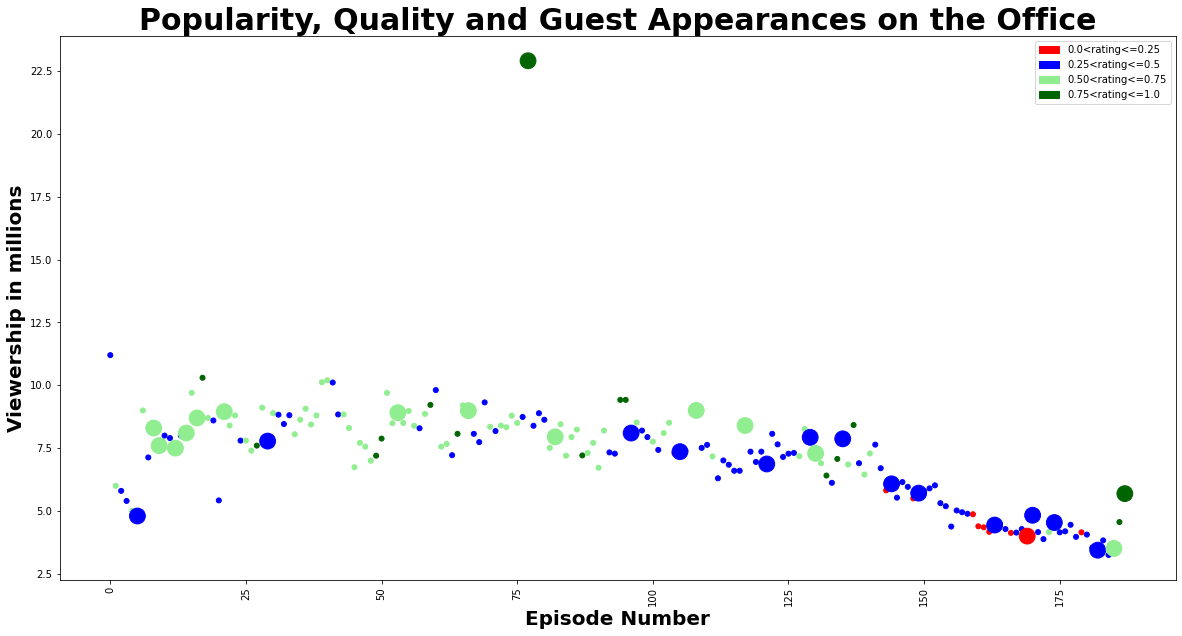

In [70]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,10)
# adding color according to scaled rating


def Ratings_color(ratings):
    ratings_color=[]
    for rating in ratings:
        if rating <0.25:
            color='red'
        if rating>=0.25 and rating <0.5:
            color='blue'
        if rating>=0.5 and rating <0.75:
            color='lightgreen'
        if rating>=0.75 and rating<=1.0:
            color='darkgreen'
        ratings_color.append(color)
    return ratings_color
    
def marker_size(guest_list):
    marker_size=[]
    for guest in guest_list:
        if guest==True:
            size=250
        else:
            size=25
        marker_size.append(size)
    return marker_size
            
color=Ratings_color(office.ScaledRating)
size=marker_size(office.has_guests)
print(size);
plt.scatter(office.EpisodeNum,office.Viewership,c=color,s=size)
plt.xticks(rotation=90);
plt.title("Popularity, Quality and Guest Appearances on the Office",fontweight='bold',fontsize='30')
plt.ylabel('Viewership in millions',fontweight='bold',fontsize='20')
plt.xlabel('Episode Number',fontweight='bold',fontsize='20')

red_patch = mpatches.Patch(color='red', label='0.0<rating<=0.25')
blue_patch = mpatches.Patch(color='blue', label='0.25<rating<=0.5')
lightgreen_patch = mpatches.Patch(color='lightgreen', label='0.50<rating<=0.75')
darkgreen_patch = mpatches.Patch(color='darkgreen', label='0.75<rating<=1.0')
plt.legend(handles=[red_patch,blue_patch,lightgreen_patch,darkgreen_patch])
